In [70]:

from netCDF4 import Dataset, num2date, date2index
import matplotlib.pyplot as plt
from matplotlib.colorbar import make_axes
import pandas as pd
import numpy as np 
#import seaborn as sns

from matplotlib.colors import LinearSegmentedColormap

In [ ]:
indicador = ['MAM']*len(df_mam['SST_std'])+['JJA']*len(df_jja['SST_std'])
df = pd.DataFrame({'SST': np.concatenate([df_mam['SST_std'],df_jja['SST_std']]),
                   'TCWV': np.concatenate([df_mam['TCWV_std'],df_jja['TCWV_std']]), 'Season':indicador})
colors = ['dodgerblue','mediumpurple']
bins = np.arange(0,0.81,0.1)

sns.jointplot(data = df, x = 'SST', y = 'TCWV', hue = 'Season', kind = 'kde', palette=colors, levels=bins) 

In [8]:
file="/home/esp-shared-a/Distribution/Users/tompkins/hotspots_anim/stats_wpac_2-9N_20170101-20170630.nc"
nc=Dataset(file)
sst_tpw=np.array(nc.variables["sst_tpw_reg"])
stdW=np.array(nc.variables["stdW"])
minW=np.array(nc.variables["minW"])

np.isnan(np.dot(stdW,sst_tpw))



True

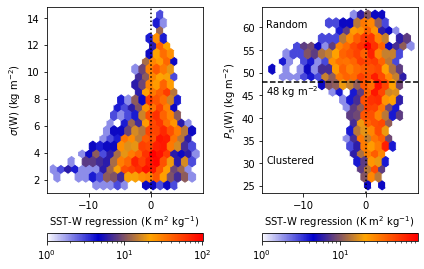

In [110]:
fig,ax=plt.subplots(1,2)

cmap=LinearSegmentedColormap.from_list('', ['white', 'mediumblue','orange','red'])

bintype="log"
cax0=ax[0].hexbin(sst_tpw,stdW,gridsize=20,bins=bintype,cmap=cmap,label="frfr")
ax[0].set_xlabel("SST-W regression (K m$^2$ kg$^{-1}$)")
ax[0].set_ylabel("$\sigma$(W) (kg m$^{-2}$)")
plt.colorbar(cax0,ax=ax[0],orientation="horizontal")

cax1=ax[1].hexbin(sst_tpw,minW,gridsize=20,bins=bintype,cmap=cmap,label="frfr")
ax[1].set_xlabel("SST-W regression (K m$^2$ kg$^{-1}$)")
ax[1].set_ylabel("$P_5$(W) (kg m$^{-2}$)")
plt.colorbar(cax1,ax=ax[1],orientation="horizontal")

ax[0].axvline(0,color="black",linestyle="dotted")
ax[1].axvline(0,color="black",linestyle="dotted")
ax[1].axhline(48,color="black",linestyle="dashed")
xanch=-16
ax[1].text(xanch,60,"Random")
ax[1].text(xanch,30,"Clustered")
ax[1].text(xanch,45,"48 kg m$^{-2}$")


plt.tight_layout()

plt.savefig("joint_PDF.pdf",dpi=600)